In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')




In [2]:
df=pd.read_csv('shopping_behavior_updated.csv')

In [3]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,3.1,Yes,Fortnightly
1,2,19,Male,Sweater,Clothing,64,3.1,Yes,Fortnightly
2,3,50,Male,Jeans,Clothing,73,3.1,Yes,Weekly
3,4,21,Male,Sandals,Footwear,90,3.5,Yes,Weekly
4,5,45,Male,Blouse,Clothing,49,2.7,Yes,Annually
...,...,...,...,...,...,...,...,...,...
1994,1995,33,Male,Sunglasses,Accessories,66,2.9,No,Weekly
1995,1996,67,Male,Boots,Footwear,80,3.0,No,Quarterly
1996,1997,67,Male,Sneakers,Footwear,27,3.3,No,Every 3 Months
1997,1998,42,Male,Backpack,Accessories,25,4.7,No,Bi-Weekly


In [4]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,3.1,Yes,Fortnightly
1,2,19,Male,Sweater,Clothing,64,3.1,Yes,Fortnightly
2,3,50,Male,Jeans,Clothing,73,3.1,Yes,Weekly
3,4,21,Male,Sandals,Footwear,90,3.5,Yes,Weekly
4,5,45,Male,Blouse,Clothing,49,2.7,Yes,Annually


In [5]:
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,3.1,Yes,Fortnightly
1,2,19,Male,Sweater,Clothing,64,3.1,Yes,Fortnightly
2,3,50,Male,Jeans,Clothing,73,3.1,Yes,Weekly
3,4,21,Male,Sandals,Footwear,90,3.5,Yes,Weekly
4,5,45,Male,Blouse,Clothing,49,2.7,Yes,Annually


In [6]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
1994,1995,33,Male,Sunglasses,Accessories,66,2.9,No,Weekly
1995,1996,67,Male,Boots,Footwear,80,3.0,No,Quarterly
1996,1997,67,Male,Sneakers,Footwear,27,3.3,No,Every 3 Months
1997,1998,42,Male,Backpack,Accessories,25,4.7,No,Bi-Weekly
1998,1999,20,Male,Pants,Clothing,45,3.4,No,Quarterly


In [7]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating
count,1999.000000,1999.000000,1999.000000,1999.000000
mean,1000.000000,44.204102,59.416708,3.747874
std,577.205914,15.382490,23.590728,0.716602
min,1.000000,18.000000,20.000000,2.500000
25%,500.500000,31.000000,38.000000,3.100000
50%,1000.000000,44.000000,59.000000,3.700000
75%,1499.500000,58.000000,80.000000,4.400000
max,1999.000000,70.000000,100.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1999 non-null   int64  
 1   Age                     1999 non-null   int64  
 2   Gender                  1999 non-null   object 
 3   Item Purchased          1999 non-null   object 
 4   Category                1999 non-null   object 
 5   Purchase Amount (USD)   1999 non-null   int64  
 6   Review Rating           1999 non-null   float64
 7   Subscription Status     1999 non-null   object 
 8   Frequency of Purchases  1999 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.7+ KB


In [9]:
df.shape

(1999, 9)

In [10]:
df1 = df.isnull().sum()


print("Null Values Count for Each Column:")
print(df1)

Null Values Count for Each Column:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Frequency of Purchases    0
dtype: int64


In [11]:
df1

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Frequency of Purchases    0
dtype: int64

In [12]:
"""
df.drop(['Location', 'Color', 'Size'], axis=1, inplace=True)


# Display the modified DataFrame
print(df)
"""

"\ndf.drop(['Location', 'Color', 'Size'], axis=1, inplace=True)\n\n\n# Display the modified DataFrame\nprint(df)\n"

In [13]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,3.1,Yes,Fortnightly
1,2,19,Male,Sweater,Clothing,64,3.1,Yes,Fortnightly
2,3,50,Male,Jeans,Clothing,73,3.1,Yes,Weekly
3,4,21,Male,Sandals,Footwear,90,3.5,Yes,Weekly
4,5,45,Male,Blouse,Clothing,49,2.7,Yes,Annually
...,...,...,...,...,...,...,...,...,...
1994,1995,33,Male,Sunglasses,Accessories,66,2.9,No,Weekly
1995,1996,67,Male,Boots,Footwear,80,3.0,No,Quarterly
1996,1997,67,Male,Sneakers,Footwear,27,3.3,No,Every 3 Months
1997,1998,42,Male,Backpack,Accessories,25,4.7,No,Bi-Weekly


In [14]:
df["Item Purchased"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Blouse
1          Sweater
2            Jeans
3          Sandals
4           Blouse
           ...    
1994    Sunglasses
1995         Boots
1996      Sneakers
1997      Backpack
1998         Pants
Name: Item Purchased, Length: 1999, dtype: object>

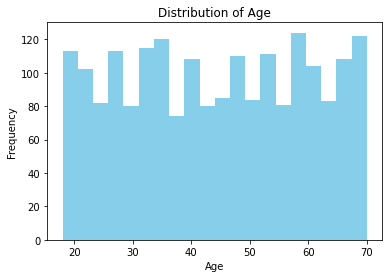

In [15]:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




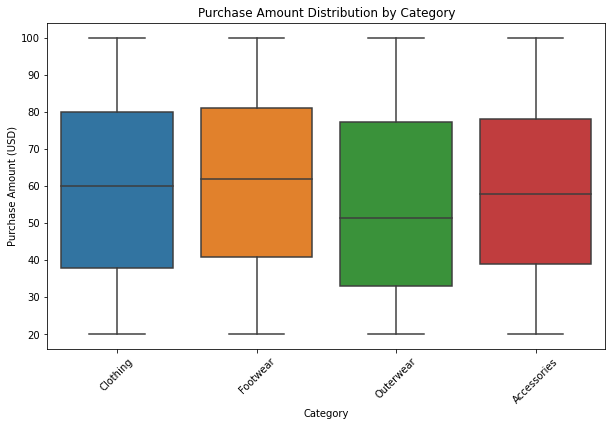

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Category')
plt.xticks(rotation=45)
plt.show()


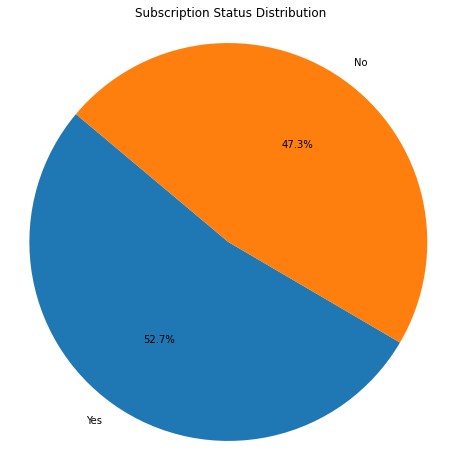

In [17]:
subscription_counts = df['Subscription Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Status Distribution')
plt.axis('equal')
plt.show()

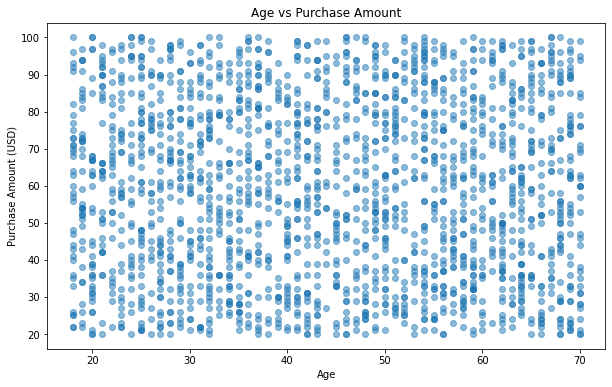

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.5)
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

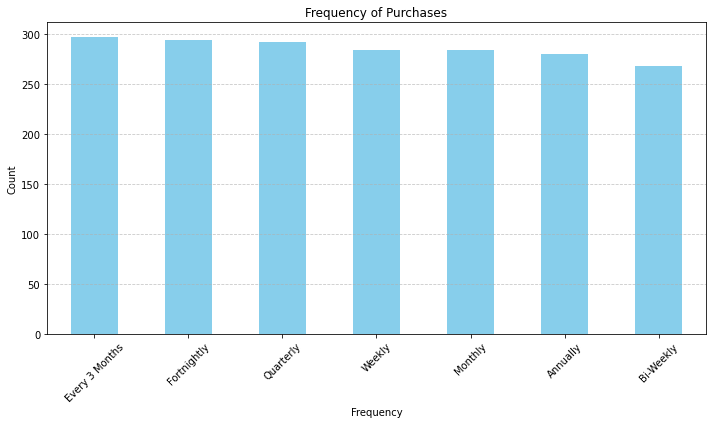

In [19]:


# Count the frequency of purchases
purchase_frequency = df['Frequency of Purchases'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
purchase_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Subscription Status' ,'Frequency of Purchases']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])




In [21]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Item Purchased']) 
y = df['Item Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
X

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
0,1,55,0,1,53,3.1,1,3
1,2,19,0,1,64,3.1,1,3
2,3,50,0,1,73,3.1,1,6
3,4,21,0,2,90,3.5,1,6
4,5,45,0,1,49,2.7,1,0
...,...,...,...,...,...,...,...,...
1994,1995,33,0,0,66,2.9,0,6
1995,1996,67,0,2,80,3.0,0,5
1996,1997,67,0,2,27,3.3,0,2
1997,1998,42,0,0,25,4.7,0,1


In [23]:
y


0        2
1       23
2       11
3       14
4        2
        ..
1994    22
1995     3
1996    20
1997     0
1998    13
Name: Item Purchased, Length: 1999, dtype: int32

In [24]:
X_train


,Customer ID,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Frequency of Purchases
240,241,47,0,1,45,3.5,1,3
812,813,64,0,2,56,3.2,1,6
1824,1825,58,0,1,47,3.8,0,4
1244,1245,70,0,1,76,3.9,0,4
1084,1085,34,0,1,36,4.1,0,5
...,...,...,...,...,...,...,...,...
1130,1131,67,0,0,41,3.9,0,1
1294,1295,27,0,1,64,4.5,0,2
860,861,26,0,2,87,4.1,1,4
1459,1460,20,0,2,35,4.8,0,3


In [25]:
y_train

240     23
812      3
1824    13
1244    21
1084    24
        ..
1130    12
1294    16
860     17
1459    17
1126    15
Name: Item Purchased, Length: 1599, dtype: int32

Silhouette Score: 0.79
accuracy 79.15830011443039


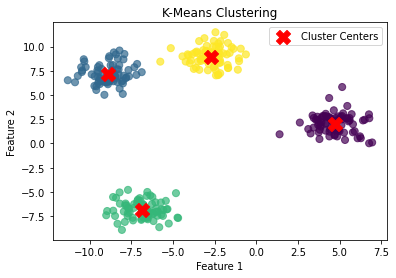

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')
acc=silhouette_avg *100 
print("accuracy",acc)

# Plot the original data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


      Customer ID  Age  Gender  Item Purchased  Category  \
0               1   55       0               2         1   
1               2   19       0              23         1   
2               3   50       0              11         1   
3               4   21       0              14         2   
4               5   45       0               2         1   
...           ...  ...     ...             ...       ...   
1994         1995   33       0              22         0   
1995         1996   67       0               3         2   
1996         1997   67       0              20         2   
1997         1998   42       0               0         0   
1998         1999   20       0              13         1   

      Purchase Amount (USD)  Review Rating  Subscription Status  \
0                        53            3.1                    1   
1                        64            3.1                    1   
2                        73            3.1                    1   
3          

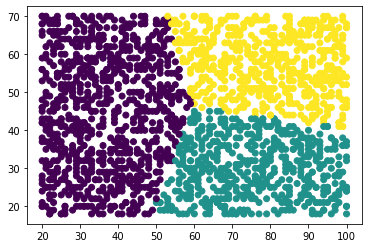

In [27]:
import matplotlib
matplotlib.use('TkAgg')
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Subscription Status' ,'Frequency of Purchases']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df)
features = ['Purchase Amount (USD)','Age']  # Replace with your actual feature names
X = df[features]


# Select the features for clustering (assuming numerical columns)


# Define the number of clusters (k)
k = 3  # You can adjust this value

# Create the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Assign cluster labels to each data point
df["cluster"] = kmeans.labels_

# Print the cluster centroids
print("Centroids:\n", kmeans.cluster_centers_)

# Visualize the clustering results (optional)
plt.scatter(X["Purchase Amount (USD)"], X["Age"], c=df["cluster"], cmap="viridis")
plt.show()
plt.savefig("static/output.jpg")





      Customer ID  Age  Gender  Item Purchased  Category  \
0               1   55       0               2         1   
1               2   19       0              23         1   
2               3   50       0              11         1   
3               4   21       0              14         2   
4               5   45       0               2         1   
...           ...  ...     ...             ...       ...   
1994         1995   33       0              22         0   
1995         1996   67       0               3         2   
1996         1997   67       0              20         2   
1997         1998   42       0               0         0   
1998         1999   20       0              13         1   

      Purchase Amount (USD)  Review Rating  Subscription Status  \
0                        53            3.1                    1   
1                        64            3.1                    1   
2                        73            3.1                    1   
3          

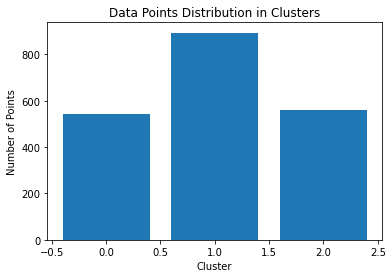

In [28]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame



from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Subscription Status' ,'Frequency of Purchases']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df)
features = ['Purchase Amount (USD)','Age']  # Replace with your actual feature names
X = df[features]


# Select the features for clustering (assuming numerical columns)


# Define the number of clusters (k)
k = 3  # You can adjust this value

# Create the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)
df["cluster"] = kmeans.labels_

cluster_counts = df['cluster'].value_counts()

# Create a bar chart
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.title("Data Points Distribution in Clusters")
plt.show()


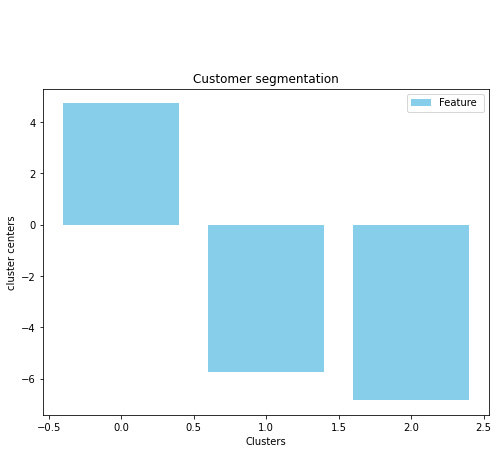

In [29]:

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Assuming you have your kmeans model and cluster centers
 # Your kmeans model
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

centers = kmeans.cluster_centers_

# Extract number of clusters
num_clusters = len(centers)

# Define cluster labels (optional)
cluster_labels = [f"Cluster {i+1}" for i in range(num_clusters)]

# Define cluster positions (on the x-axis)
cluster_positions = range(num_clusters)  # Adjust spacing if needed

# Create the bar plot (one bar for each cluster center)
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
bars = plt.bar(cluster_positions, centers[:, 0], color='skyblue', label='Feature ')

# Add labels and title
plt.xlabel("Clusters")
plt.ylabel("cluster centers")  # Assuming centers have multiple features
plt.title("Customer segmentation")

# Optional: Add labels for other features (if centers have more than 1 dimension)
for i, center in enumerate(centers):
  plt.text(cluster_positions[i], center[1] + 0.1, f" ", ha='center')  # Adjust y-offset and formatting

# Display the plot
plt.legend()
plt.show()
#plt.savefig("static/output.jpg")


Silhouette Score (DBSCAN): 0.32
accuracy 32.47770651894683


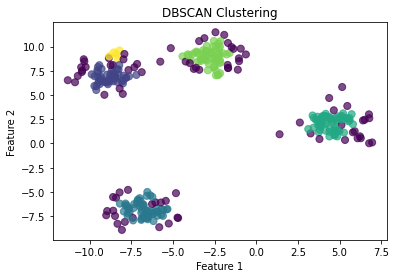

In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the original data points and DBSCAN clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate DBSCAN using silhouette score
silhouette_avg = silhouette_score(X, dbscan_labels)
print(f'Silhouette Score (DBSCAN): {silhouette_avg:.2f}')
acc=silhouette_avg *100
print("accuracy",acc)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Subscription Status' ,'Frequency of Purchases']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=4000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize AdaBoost classifier
logistic = LogisticRegression( random_state=100)

# Train the model
logistic.fit(X_train, y_train)

# Make predictions
y_pred =logistic.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))





Accuracy: 0.93375
Accuracy: 0.93375
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       401
           1       0.93      0.94      0.93       399

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate sample data
X, y = make_classification(n_samples=4000, n_features=20, random_state=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

# Initialize AdaBoost classifier
random_classifier = RandomForestClassifier(n_estimators=50, random_state=100)

# Train the model
random_classifier.fit(X_train, y_train)

# Make predictions
y_pred =random_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Accuracy:", accuracy)

# Display classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.985
Accuracy: 0.985
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       401
           1       0.98      0.99      0.99       399

    accuracy                           0.98       800
   macro avg       0.99      0.99      0.98       800
weighted avg       0.99      0.98      0.98       800



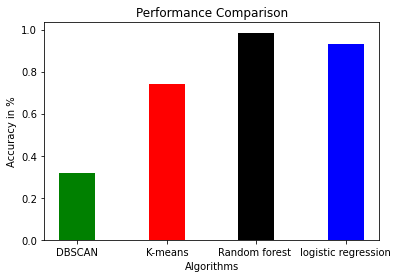

In [33]:
from matplotlib import pyplot as plt
# x-coordinates of left sides of bars  
left = [2,4,6,8] 
  
# heights of bars 
height = [0.32, 0.74,0.985,0.93] 
  
# labels for bars 
tick_label = ['DBSCAN','K-means','Random forest ', 'logistic regression'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = [ 'green','red',"black","blue"]) 
  
# naming the x-axis 
plt.xlabel('Algorithms') 
# naming the y-axis 
plt.ylabel('Accuracy in %') 
# plot title 
plt.title('Performance Comparison') 
  
# function to show the plot 
plt.rcParams['figure.figsize'] = (500,400)
plt.show()

In [34]:
filename = 'customer_model.pkl'
pickle.dump(random_classifier, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))